### Проект 4 [Стоимость мобильного телефона]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для прогнозирования **диапазона цен** на мобильные телефоны. (```"price_range"```).

    > 0 (низкая цена)
    > 1 (средняя цена)
    > 2 (высокая цена)
    > 3 (очень высокая цена)

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

# **1. ОЧИСТКА ДАННЫХ**

## **1.1.  БЛОК ИМПОРТА**

In [1]:
from pandas import read_csv, options, set_option, DataFrame, Series, get_dummies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# модули обучения и построения моделей
from src.functions import *


## **1.2. ЗАГРУЗКА ДАННЫХ**

In [2]:
# присвоение данных
df_train = set_numbercolumn(df=load_data(file="./train_data.csv"), columnname="Id")
df_test  = set_numbercolumn(df=load_data(file="./test_data.csv"), columnname="Id")

## **1.3. ИССЛЕДОВАНИЕ ВВОДНЫХ ДАННЫХ**

### **1.3.1. `Тренировочные данные` 'train'**

1. При визуальном осмотре файла аномалий в виде непонятных и "грязных" данных не выявлено.
2. Вывод данных на экран и первичный сбор информации в выборке отсутствующих значений (NaN) не выявил.
3. Замечен широкий диапазон размерностей параметров, что, вероятно, потребует стандартизацию данных.
4. Ход решения указан в соотвествующих шагах обработки выборки.

In [3]:
# Установка параметра display.max_columns в None
set_option('display.max_columns', None)

In [4]:
# тренировочная выборка
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
Id,,,,,,,,,,,,,,,,,,,,,
1,1938,1,0.5,1,5,0,44,0.5,121,2,9,1299,1935,3497,18,10,18,0,1,0,3
2,1831,0,1.4,1,2,0,43,0.9,150,5,5,611,1381,3834,17,7,13,1,1,1,3
3,763,0,1.7,1,8,1,2,0.5,92,8,14,1028,1186,1050,6,4,8,1,1,0,0
4,851,0,0.5,0,3,0,21,0.4,200,5,7,1171,1263,478,12,7,10,1,0,1,0
5,712,0,0.5,0,6,0,27,0.5,86,2,11,1245,1309,2001,11,10,12,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,1715,1,0.5,1,1,1,18,0.1,96,6,3,674,1375,2598,17,2,3,1,0,0,3
1797,1384,1,2.8,1,15,0,60,0.1,82,3,18,983,1210,1221,18,12,15,1,0,1,1
1798,1379,1,2.1,1,14,1,63,1.0,83,1,17,207,1370,651,9,6,7,1,1,0,0


#### 1.3.1.1. Статистика по типам данным

Требуется приведение типов для некоторых столбцов. Для этого сделано изучение данных доступными способами.

In [5]:
# статистика по типам данным
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 1 to 1800
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1800 non-null   int64  
 1   blue           1800 non-null   int64  
 2   clock_speed    1800 non-null   float64
 3   dual_sim       1800 non-null   int64  
 4   fc             1800 non-null   int64  
 5   four_g         1800 non-null   int64  
 6   int_memory     1800 non-null   int64  
 7   m_dep          1800 non-null   float64
 8   mobile_wt      1800 non-null   int64  
 9   n_cores        1800 non-null   int64  
 10  pc             1800 non-null   int64  
 11  px_height      1800 non-null   int64  
 12  px_width       1800 non-null   int64  
 13  ram            1800 non-null   int64  
 14  sc_h           1800 non-null   int64  
 15  sc_w           1800 non-null   int64  
 16  talk_time      1800 non-null   int64  
 17  three_g        1800 non-null   int64  
 18  touch_screen 

In [6]:
df_train.select_dtypes("int")

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
Id,,,,,,,,,,,,,,,,,,,
1,1938,1,1,5,0,44,121,2,9,1299,1935,3497,18,10,18,0,1,0,3
2,1831,0,1,2,0,43,150,5,5,611,1381,3834,17,7,13,1,1,1,3
3,763,0,1,8,1,2,92,8,14,1028,1186,1050,6,4,8,1,1,0,0
4,851,0,0,3,0,21,200,5,7,1171,1263,478,12,7,10,1,0,1,0
5,712,0,0,6,0,27,86,2,11,1245,1309,2001,11,10,12,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,1715,1,1,1,1,18,96,6,3,674,1375,2598,17,2,3,1,0,0,3
1797,1384,1,1,15,0,60,82,3,18,983,1210,1221,18,12,15,1,0,1,1
1798,1379,1,1,14,1,63,83,1,17,207,1370,651,9,6,7,1,1,0,0


In [7]:
# список всех столбцов таблицы
total_columnn_list = df_train.columns.to_list()

# контейнеры для сортировки
noencode_list = []
forencode_list = []
count_forencode_dict = {}

# столбцы, где не требуется приводить значения к бинарному типу
for val in total_columnn_list:
    un = df_train[val].unique()
    if len(un) == 2:
        print(f"{val} = {len(un)}", "=>",un)
        noencode_list.append(val)
        count_forencode_dict[val] = len(un)
    
    # список столбцов для кодирования
    else:
        print(f"=== {val} = {len(un)}")
        forencode_list.append(val)
        count_forencode_dict[val] = len(un)

print("="*50)
print("\nСписок столбцов где НЕ требуется кодирование\n", noencode_list)
print("="*50)

print("\nСписок столбцов где требуется кодирование\n", forencode_list)
print("="*50)

print("\nСписок количества категорий для кодирования\n", sorted(count_forencode_dict.values()))

=== battery_power = 1041
blue = 2 => [1 0]
=== clock_speed = 26
dual_sim = 2 => [1 0]
=== fc = 20
four_g = 2 => [0 1]
=== int_memory = 63
=== m_dep = 10
=== mobile_wt = 121
=== n_cores = 8
=== pc = 21
=== px_height = 1074
=== px_width = 1055
=== ram = 1436
=== sc_h = 15
=== sc_w = 19
=== talk_time = 19
three_g = 2 => [0 1]
touch_screen = 2 => [1 0]
wifi = 2 => [0 1]
=== price_range = 4

Список столбцов где НЕ требуется кодирование
 ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

Список столбцов где требуется кодирование
 ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']

Список количества категорий для кодирования
 [2, 2, 2, 2, 2, 2, 4, 8, 10, 15, 19, 19, 20, 21, 26, 63, 121, 1041, 1055, 1074, 1436]


Количество категорий относительно невелико, поэтому можно сделать поверхностный визуальный обзор параметров для разбиения на группы. Для этого делается изучение данных столбцов с последующим принятием решения каким способом сделать при необходимости кодирование данных.

In [8]:
# 'float'
for val in forencode_list:
    if df_train[val].dtype != np.int64:
        unik = df_train[val].sort_values().unique()
        print(val, unik, len(unik), sep=" => ")

clock_speed => [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ] => 26
m_dep => [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] => 10


In [9]:
# список колонок типа 'int64'
int_col_list = df_train[forencode_list].select_dtypes(include=np.int64).columns.to_list()
int_col_list

['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'price_range']

На основе исследования графиков принято решение разбить данные из многочисленных значений целого типа на группы, выделенные на `boxplot` и `histplot` (шкала 'x').

Исследование на состав значений параметров типа 'int':
battery_power => [ 501  502  503 ... 1996 1997 1998] => 1041 => Количество групп:  => 6
clock_speed => [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ] => 26 => Количество групп:  => 5
fc => [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] => 20 => Количество групп:  => 6
int_memory => [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] => 63 => Количество групп:  => 6
m_dep => [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] => 10 => Количество групп:  => 7
mobile_wt => [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 

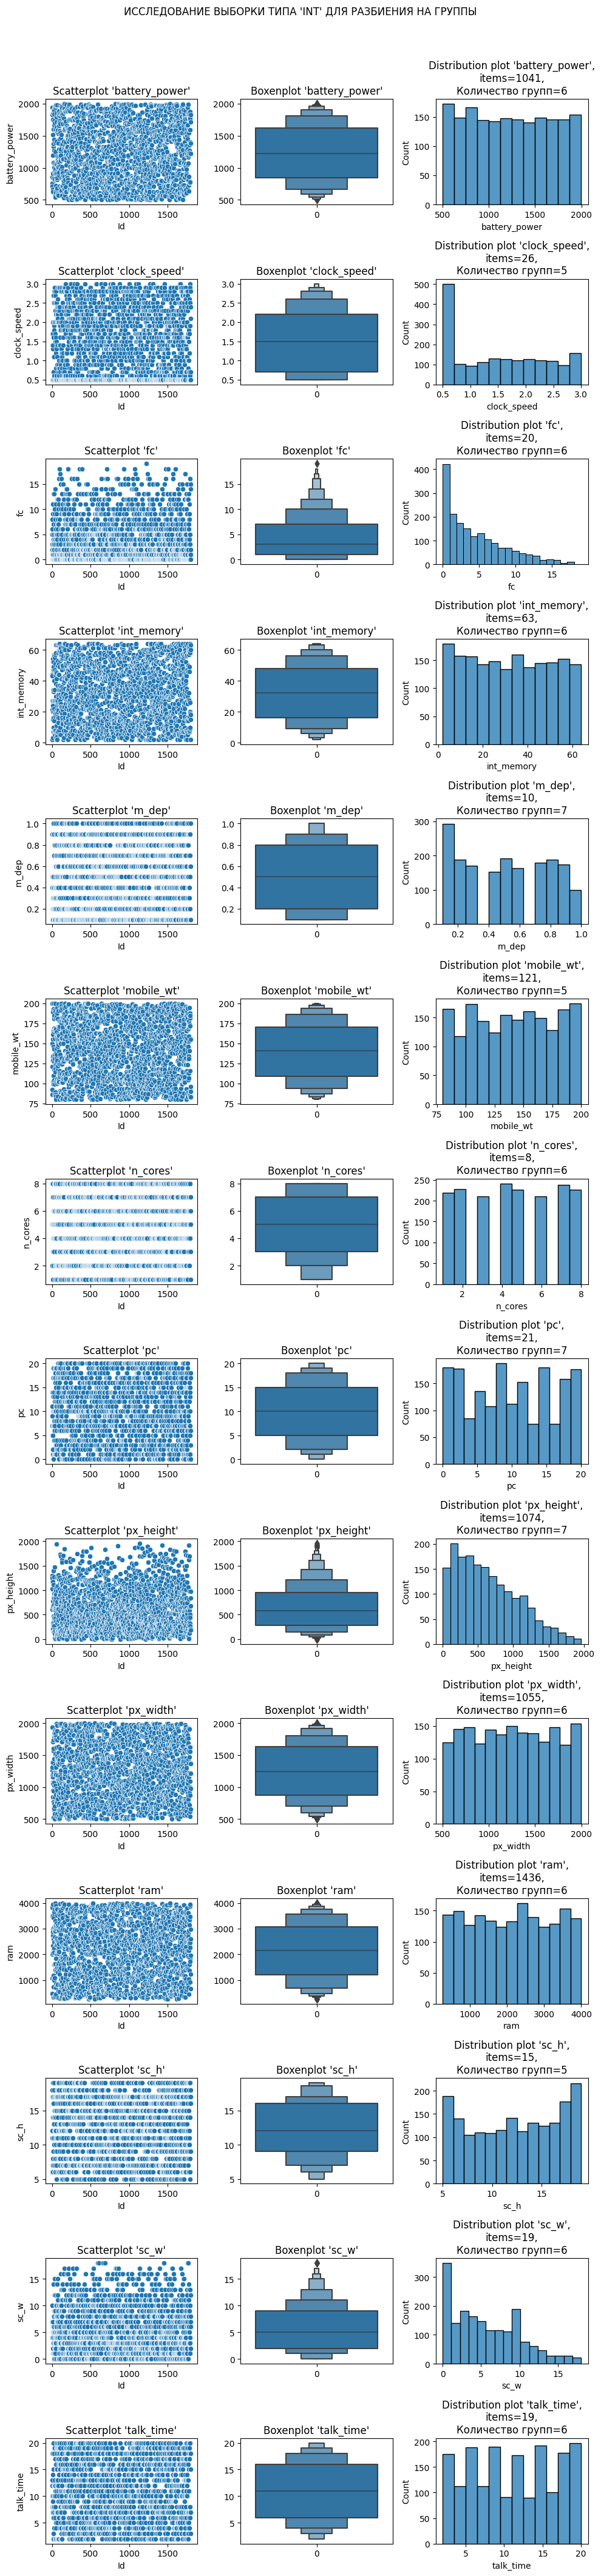

In [10]:
# словарь с данными для разбиения на группы
groups_int_dict = {}

# построение графиков и заполнение словаря
fig, axs = plt.subplots(nrows=len(forencode_list[:-1]), ncols=3, figsize=(10, len(forencode_list[:-1]) * 3))
print("Исследование на состав значений параметров типа 'int':", end="\n" + "="*100 + "\n")
for i, val in enumerate(forencode_list[:-1]):
    # if df_train[val].dtype == np.int64:

        # ИССЛЕДОВАНИЕ
        sns.scatterplot(df_train[val], ax=axs[i][0])
        axs[i][0].set_title(f"Scatterplot '{val}'")

        sns.boxenplot(df_train[val].values, ax=axs[i][1])
        axs[i][1].set_title(f"Boxenplot '{val}'")

        sns.histplot(df_train[val], ax=axs[i][2])

        # получение групповой переменной
        x_ticks_labels = [item.get_text() for item in axs[i][2].get_xticklabels()]

        # получение количества групп
        num_groups = len(set(x_ticks_labels))
        
        axs[i][2].set_title(f"Distribution plot '{val}',\nitems={len(df_train[val].unique())},\nКоличество групп={num_groups}")

        # # получение осей графика
        # ax = plt.gca()

        unik = df_train[val].sort_values().unique()
        print(val, unik, len(unik), "Количество групп: ", num_groups, sep=" => ")

        groups_int_dict[val] = num_groups

        # print("Количество групп: ", num_groups)

plt.suptitle("ИССЛЕДОВАНИЕ ВЫБОРКИ ТИПА 'INT' ДЛЯ РАЗБИЕНИЯ НА ГРУППЫ", y=1.01)
plt.tight_layout()
plt.show()



Проверка количества групп для кодирования по столбцам

In [11]:
# количество групп для кодирования по столбцам
groups_int_dict

{'battery_power': 6,
 'clock_speed': 5,
 'fc': 6,
 'int_memory': 6,
 'm_dep': 7,
 'mobile_wt': 5,
 'n_cores': 6,
 'pc': 7,
 'px_height': 7,
 'px_width': 6,
 'ram': 6,
 'sc_h': 5,
 'sc_w': 6,
 'talk_time': 6}

#### 1.3.1.2. Выявление уникальных значений выборки

Результат уникальных значений для данной выборки свидетельствует об отсутствии 'NaN-значений'.

In [12]:
df_train.value_counts(dropna=False)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram   sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
501            0     2.3          0         12  1       54          0.3    131        4        19  504        1089      2346  13    12    2          1        0             1     1              1
1528           0     2.4          0         2   0       37          0.2    156        8        3   306        564       733   15    0     14         1        1             0     0              1
1501           0     1.1          0         12  1       2           0.2    187        1        15  198        1056      2487  13    12    16         1        1             1     2              1
1498           1     1.2          1         0   1       14          0.1    191        4        1   111        1167      577   14    12    12         1        1             0     0              1
                     0.7      

#### **1.3.1.3. Пустые значения в таблице**

##### 1.3.1.3.1. Определение количества и названия пустых значений

Отсутствующие данных в выборке **не выявлены**.

In [13]:
# определение количества пустых значений
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### 1.3.1.4. Описание выборки с числовыми типами данных

In [14]:
# Предварительное неполное описание выборки
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,1237.533333,0.499444,1.517944,0.509444,4.342778,0.525000,32.197222,0.502778,140.413889,4.523333,9.911111,646.903333,1251.507222,2123.113889,12.317778,5.760556,10.973333,0.765556,0.498889,0.508333,1.500556
std,440.853947,0.500139,0.813604,0.500050,4.331555,0.499513,18.192214,0.289281,35.407189,2.289379,6.043192,444.707272,431.917209,1089.215102,4.210434,4.342084,5.488921,0.423769,0.500138,0.500069,1.120331
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,848.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,280.000000,874.000000,1195.250000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1224.500000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,10.000000,575.500000,1247.000000,2156.000000,12.000000,5.000000,11.000000,1.000000,0.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.250000,7.000000,15.000000,952.000000,1633.000000,3063.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### **1.3.1.5. Графическое представление тренировочной выборки**

Высокое значение `std` для 'price_range' говорит о высоком разбросе величины взноса во всём обучаемом диапазоне. График концентрации (правая грань) показывает моду справа, оставляя слева аномальное наименьшее распределение взносов. При этом даже со стороны выбросов наблюдаются свои моды и прогибы в графике, что говорит о неравномерности распределения данных в этом диапазоне.

Такое распределение данных говорит о нелинейности зависимости величины взноса от других параметров.

Зависимость 'price_range' от параметров будет показано в разделе обучения моделей.

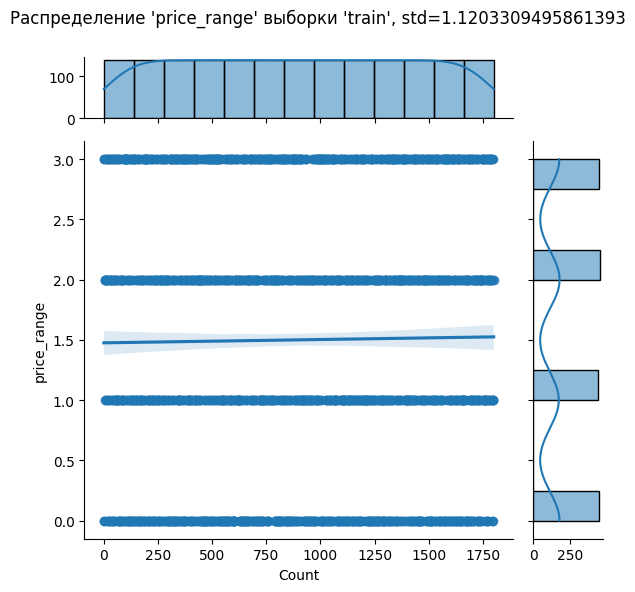

In [15]:
# Распределение 'price_range'
g = sns.jointplot(df_train['price_range'], kind="reg", marginal_ticks=True);
g.fig.suptitle(f"Распределение 'price_range' выборки 'train', std={df_train['price_range'].std()}");
g.fig.tight_layout();
g.fig.subplots_adjust(top=0.9); # отступ от графика для заголовка
plt.xlabel("Count");


Распределение стоимости телефонов по классам примерно одинаковое.

In [16]:
# распределение стоимости телефонов
df_train['price_range'].value_counts()

price_range
2    455
0    454
3    450
1    441
Name: count, dtype: int64

#### 1.4. Кодирование данных

Так как параметры имеют широкий диапазон численных значений, данные необходимо стандартизировать. Но модели принимают только положительные значения, поэтому кодирование данных не требуется.

#### 1.4.1. Закодированные данные

In [17]:
# список столбцов
columns_list = df_train.columns.to_list()
columns_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [18]:
# финальные закодированные датасет
step_dict, df_FINAL_train = scale_data(df_data=df_train, df_train=df_train, groups_int_dict=groups_int_dict)
_, df_FINAL_test  = scale_data(df_data=df_test, df_train=df_train, groups_int_dict=groups_int_dict,
                               isTrain=False,
                               step_dict=step_dict,
                               columns_list=df_FINAL_train.columns.to_list())

In [19]:
# df_FINAL_train = df_FINAL_train.reset_index()
df_FINAL_train

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_less1044,battery_power_less1218,battery_power_less1392,battery_power_less1566,battery_power_less1740,battery_power_less1914,battery_power_less522,battery_power_less696,battery_power_less870,battery_power_more1998,clock_speed_more3,fc_less0,fc_less12,fc_less15,fc_less18,fc_less3,fc_less6,fc_less9,fc_more19,int_memory_less10,int_memory_less20,int_memory_less30,int_memory_less40,int_memory_less50,int_memory_less60,int_memory_more64,m_dep_more1,mobile_wt_less120,mobile_wt_less144,mobile_wt_less168,mobile_wt_less192,mobile_wt_less96,mobile_wt_more200,n_cores_less1,n_cores_less2,n_cores_less3,n_cores_less4,n_cores_less5,n_cores_less6,n_cores_less7,n_cores_more8,pc_less0,pc_less12,pc_less15,pc_less18,pc_less3,pc_less6,pc_less9,pc_more20,px_height_less0,px_height_less1071,px_height_less1224,px_height_less1377,px_height_less153,px_height_less1530,px_height_less1683,px_height_less1836,px_height_less306,px_height_less459,px_height_less612,px_height_less765,px_height_less918,px_height_more1960,px_width_less1056,px_width_less1232,px_width_less1408,px_width_less1584,px_width_less1760,px_width_less1936,px_width_less528,px_width_less704,px_width_less880,px_width_more1998,ram_less1195,ram_less1434,ram_less1673,ram_less1912,ram_less2151,ram_less2390,ram_less2629,ram_less2868,ram_less3107,ram_less3346,ram_less3585,ram_less3824,ram_less478,ram_less717,ram_less956,ram_more3998,sc_h_less12,sc_h_less15,sc_h_less18,sc_h_less6,sc_h_less9,sc_h_more19,sc_w_less0,sc_w_less12,sc_w_less15,sc_w_less3,sc_w_less6,sc_w_less9,sc_w_more18,talk_time_less12,talk_time_less15,talk_time_less18,talk_time_less3,talk_time_less6,talk_time_less9,talk_time_more20
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,3,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1797,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1798,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0

In [20]:
df_FINAL_train.columns.to_list()


['price_range',
 'blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'battery_power_less1044',
 'battery_power_less1218',
 'battery_power_less1392',
 'battery_power_less1566',
 'battery_power_less1740',
 'battery_power_less1914',
 'battery_power_less522',
 'battery_power_less696',
 'battery_power_less870',
 'battery_power_more1998',
 'clock_speed_more3',
 'fc_less0',
 'fc_less12',
 'fc_less15',
 'fc_less18',
 'fc_less3',
 'fc_less6',
 'fc_less9',
 'fc_more19',
 'int_memory_less10',
 'int_memory_less20',
 'int_memory_less30',
 'int_memory_less40',
 'int_memory_less50',
 'int_memory_less60',
 'int_memory_more64',
 'm_dep_more1',
 'mobile_wt_less120',
 'mobile_wt_less144',
 'mobile_wt_less168',
 'mobile_wt_less192',
 'mobile_wt_less96',
 'mobile_wt_more200',
 'n_cores_less1',
 'n_cores_less2',
 'n_cores_less3',
 'n_cores_less4',
 'n_cores_less5',
 'n_cores_less6',
 'n_cores_less7',
 'n_cores_more8',
 'pc_less0',
 'pc_less12',
 'pc_less15',
 'pc_less18',
 'pc_less3',
 'p

In [21]:

columns_list_scale = df_FINAL_train.columns.to_list()

# обучение
X_train = df_FINAL_train[columns_list_scale[1:]].values
y_train = df_FINAL_train[columns_list_scale[0]].values
# тест
X_test = df_FINAL_test[columns_list_scale[1:]].values
y_test = df_FINAL_test[columns_list_scale[0]].values

In [22]:
df_FINAL_test

,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power_less1044,battery_power_less1218,battery_power_less1392,battery_power_less1566,battery_power_less1740,battery_power_less1914,battery_power_less522,battery_power_less696,battery_power_less870,battery_power_more1998,clock_speed_more3,fc_less0,fc_less12,fc_less15,fc_less18,fc_less3,fc_less6,fc_less9,int_memory_less10,int_memory_less20,int_memory_less30,int_memory_less40,int_memory_less50,int_memory_less60,int_memory_more64,m_dep_more1,mobile_wt_less120,mobile_wt_less144,mobile_wt_less168,mobile_wt_less192,mobile_wt_less96,mobile_wt_more200,n_cores_less1,n_cores_less2,n_cores_less3,n_cores_less4,n_cores_less5,n_cores_less6,n_cores_less7,n_cores_more8,pc_less0,pc_less12,pc_less15,pc_less18,pc_less3,pc_less6,pc_less9,pc_more20,px_height_less1071,px_height_less1224,px_height_less1377,px_height_less153,px_height_less1530,px_height_less1683,px_height_less1836,px_height_less306,px_height_less459,px_height_less612,px_height_less765,px_height_less918,px_height_more1960,px_width_less1056,px_width_less1232,px_width_less1408,px_width_less1584,px_width_less1760,px_width_less1936,px_width_less528,px_width_less704,px_width_less880,px_width_more1998,ram_less1195,ram_less1434,ram_less1673,ram_less1912,ram_less2151,ram_less2390,ram_less2629,ram_less2868,ram_less3107,ram_less3346,ram_less3585,ram_less3824,ram_less478,ram_less717,ram_less956,ram_more3998,sc_h_less12,sc_h_less15,sc_h_less18,sc_h_less6,sc_h_less9,sc_h_more19,sc_w_less0,sc_w_less12,sc_w_less15,sc_w_less3,sc_w_less6,sc_w_less9,sc_w_more18,talk_time_less12,talk_time_less15,talk_time_less18,talk_time_less3,talk_time_less6,talk_time_less9,talk_time_more20,fc_more19,px_height_less0
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5,2,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
197,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
198,3,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,

In [23]:
df_train[columns_list[0]].value_counts(normalize=True)

battery_power
1872    0.003333
1413    0.002778
832     0.002778
618     0.002778
1589    0.002778
          ...   
695     0.000556
1275    0.000556
1927    0.000556
1557    0.000556
1832    0.000556
Name: proportion, Length: 1041, dtype: float64

# **2. ОБУЧЕНИЕ МОДЕЛЕЙ**

#### **2.1. Random Forest**

In [24]:
# Случайный лес (Random Forest)
model_forest = RandomForestClassifier(random_state=42)

# обучение модели
model_forest.fit(X_train, y_train)

# Предсказываем диапазон цен для тестовых данных
y_pred_forest = model_forest.predict(X_test)

# метрики
precision_forest, recall_forest, f1_score_forest = precision_recall_fscore(truth=y_test, preds=y_pred_forest)

In [25]:
# print(precision_forest, recall_forest, f1_score_forest)

#### **2.2. Gradient Boosting**

In [26]:
# Градиентный бустинг (Gradient Boosting)
model_gbc = GradientBoostingClassifier()

# обучение модели
model_gbc.fit(X_train, y_train)

# Предсказываем диапазон цен для тестовых данных
y_pred_gbc = model_gbc.predict(X_test)

# метрики
precision_gbc, recall_gbc, f1_score_gbc = precision_recall_fscore(truth=y_test, preds=y_pred_gbc)

#### **2.3. Logistic Regression**

In [27]:
# Логистическая регрессия (Logistic Regression)
model_logistic = LogisticRegression(max_iter=10000)

# обучение модели
model_logistic.fit(X_train, y_train)

# Предсказываем диапазон цен для тестовых данных
y_pred_logistic = model_logistic.predict(X_test)

# метрики
precision_logistic, recall_logistic, f1_score_logistic = precision_recall_fscore(truth=y_test, preds=y_pred_logistic)

#### **2.4 K-Nearest Neighbors**

In [28]:
# K-ближайших соседей (K-Nearest Neighbors)
model_kn = KNeighborsClassifier()

# обучение модели
model_kn.fit(X_train, y_train)

# Предсказываем диапазон цен для тестовых данных
y_pred_kn = model_kn.predict(X_test)

# метрики
precision_kn, recall_kn, f1_score_kn = precision_recall_fscore(truth=y_test, preds=y_pred_kn)

#### **2.5. Naive Bayes**

In [29]:
# Наивный байесовский классификатор (Naive Bayes)
model_gnb = GaussianNB()

# обучение модели
model_gnb.fit(X_train, y_train)

# Предсказываем диапазон цен для тестовых данных
y_pred_gnb = model_gnb.predict(X_test)


# метрики
precision_gnb, recall_gnb, f1_score_gnb = precision_recall_fscore(truth=y_test, preds=y_pred_gnb)

#### **2.6. Decision Tree**

In [30]:
# Решающее дерево (Decision Tree)
model_tree = DecisionTreeClassifier()

# Обучение модели
model_tree.fit(X_train, y_train)

# Прогнозирование диапазона цен
y_pred_tree = model_tree.predict(X_test)

# метрики
precision_tree, recall_tree, f1_score_tree = precision_recall_fscore(truth=y_test, preds=y_pred_tree)

#### **2.7. Support Vector Machine (SVM)**

In [31]:
# Метод опорных векторов (Support Vector Machine)
model_svc = SVC()

# Обучение модели
model_svc.fit(X_train, y_train)

# Прогнозирование диапазона цен
y_pred_svc = model_svc.predict(X_test)

# метрики
precision_svc, recall_svc, f1_score_svc = precision_recall_fscore(truth=y_test, preds=y_pred_svc)

#### **2.8. СРАВНЕНИЕ МЕТРИК**

In [32]:
# сравнение метрик
df_metrics = DataFrame({"forest":[precision_forest, recall_forest, f1_score_forest],
                        "gbc":[precision_gbc, recall_gbc, f1_score_gbc],
                        "logistic":[precision_logistic, recall_logistic, f1_score_logistic],
                        "kn":[precision_kn, recall_kn, f1_score_kn],
                        "gnb":[precision_gnb, recall_gnb, f1_score_gnb],
                        "tree":[precision_tree, recall_tree, f1_score_tree],
                        "svc":[precision_svc, recall_svc, f1_score_svc]
                        },
                        index=["precision", "recall", "f1_score"])
df_metrics

,forest,gbc,logistic,kn,gnb,tree,svc
precision,0.892857,0.924528,0.894737,0.733333,0.962963,0.833333,0.833333
recall,0.961538,0.960784,0.927273,0.550000,0.464286,0.833333,0.980392
f1_score,0.925926,0.942308,0.910714,0.628571,0.626506,0.833333,0.900901


In [33]:
# сортировка по 'f1_score'
df_metrics.T.sort_values(by="f1_score", ascending=False)

,precision,recall,f1_score
gbc,0.924528,0.960784,0.942308
forest,0.892857,0.961538,0.925926
logistic,0.894737,0.927273,0.910714
svc,0.833333,0.980392,0.900901
tree,0.833333,0.833333,0.833333
kn,0.733333,0.550000,0.628571
gnb,0.962963,0.464286,0.626506


In [34]:
# сортировка по 'precision'
df_metrics.T.sort_values(by="precision", ascending=False)

,precision,recall,f1_score
gnb,0.962963,0.464286,0.626506
gbc,0.924528,0.960784,0.942308
logistic,0.894737,0.927273,0.910714
forest,0.892857,0.961538,0.925926
tree,0.833333,0.833333,0.833333
svc,0.833333,0.980392,0.900901
kn,0.733333,0.550000,0.628571


In [35]:
# сортировка по 'recall'
df_metrics.T.sort_values(by="recall", ascending=False)

,precision,recall,f1_score
svc,0.833333,0.980392,0.900901
forest,0.892857,0.961538,0.925926
gbc,0.924528,0.960784,0.942308
logistic,0.894737,0.927273,0.910714
tree,0.833333,0.833333,0.833333
kn,0.733333,0.550000,0.628571
gnb,0.962963,0.464286,0.626506


#### **2.9. ВИЗУАЛИЗАЦИЯ**

##### **2.9.1. Общее измениение метрик относительно модели**

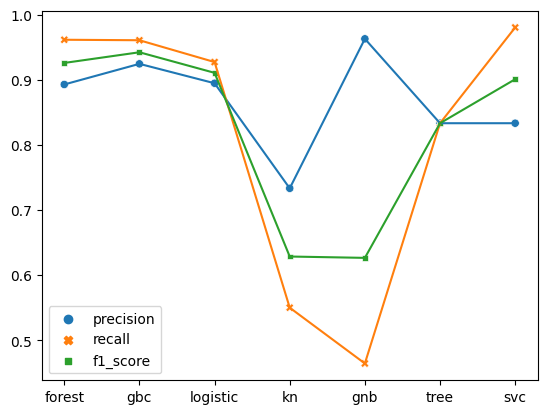

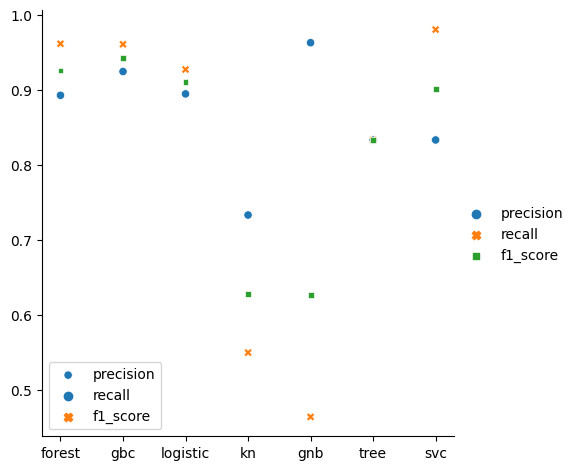

In [36]:
fig, axs = plt.subplots();
axs.plot(df_metrics.T);
sns.scatterplot(df_metrics.T);
sns.relplot(df_metrics.T);
plt.legend(df_metrics.T.columns);


##### **2.9.2. Динамика метрик моделей**

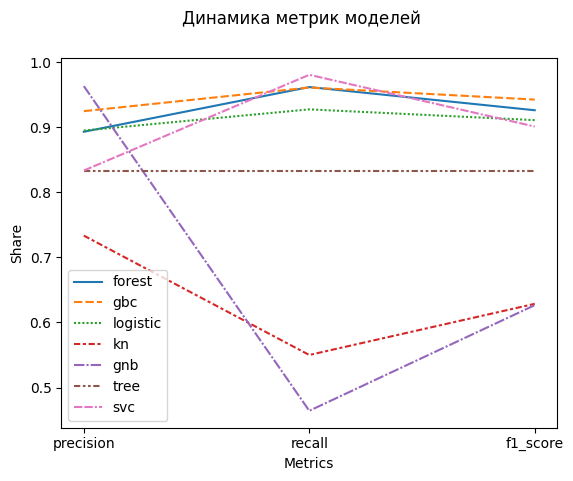

In [37]:
sns.lineplot(df_metrics);
plt.suptitle("Динамика метрик моделей");
plt.xlabel("Metrics");
plt.ylabel("Share");

## **РЕЗЮМЕ**

Четыре модели показали хорошие результаты предсказаний диапазона цен "price_range" на мобильные телефоны при стандартных настройках (f1_score > 0.9).

**f1_score**

**Наилучшая** модель `Gradient Boosting`.
**Наихужшие** показатели у `Naive Bayes` и `K-Nearest Neighbors`.

***
**precision**


Определение TP (precision) **лучшее** у модели `Gradient Boosting`
**Наихужшие** показатели у `K-Nearest Neighbors`.

***

**recall**


Классификация только TP.
**Наилучшие** показатели у модели `SVC`.
**Хуже** всего проявила себя модель `Gradient Boosting`

***

## **ВЫВОД**
Качество предсказаний всех моделей можно улучшить изменением стандартных настроек каждого метода классификации.

Некоторые модели можно осторожно применять для классификации диапазона цен на мобильные телефоны со стандартными насройками в сочетании с другими маркетинговыми исследованиями.